# 4.1 영화 리뷰 분류: 이진 분류 문제
## 4.1.1 IMDB 데이터셋

In [1]:
# 4-1 IMDV 데이터셋 로드하기

from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 4-2 리뷰를 다시 텍스트로 디코딩하기

word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매팡하도록 뒤집음
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# 리뷰를 디코딩. 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위해 예약되어 있으므로 인덱스에서 3을 뺌

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 4.1.2 데이터 준비

In [3]:
# 4-3 정수 시퀀스를 멀티-핫 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듦
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만듦
    return results
x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 4.1.3 신경망 모델 만들기

In [4]:
# 4-4 모델 정의하기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [5]:
# 4-5 모델 컴파일하기

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ["accuracy"])

# 4.1.4 훈련 검증

In [6]:
# 4-6 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
# 4-7 모델 훈련하기

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7037 - loss: 0.5880 - val_accuracy: 0.8377 - val_loss: 0.4163
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8881 - loss: 0.3353 - val_accuracy: 0.8857 - val_loss: 0.3076
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9227 - loss: 0.2414 - val_accuracy: 0.8811 - val_loss: 0.2942
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9386 - loss: 0.1931 - val_accuracy: 0.8870 - val_loss: 0.2834
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9509 - loss: 0.1563 - val_accuracy: 0.8891 - val_loss: 0.2774
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9603 - loss: 0.1294 - val_accuracy: 0.8859 - val_loss: 0.2872
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9674 - loss: 0.1120 - val_accuracy: 0.8836 - val_loss: 0.2998
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9734 - loss: 0.0947 - val_accuracy: 0.8825 - 

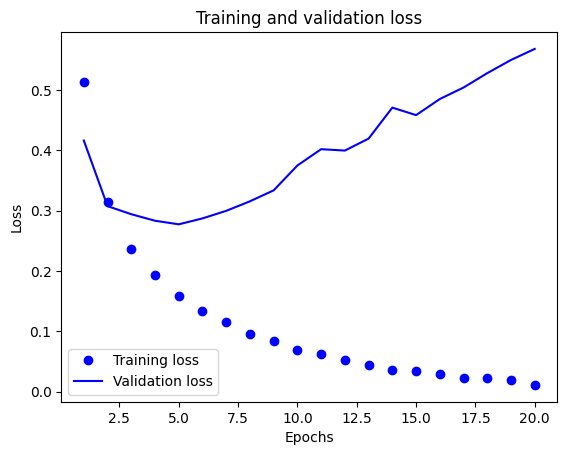

In [8]:
# 4-8 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss") # bo는 파란색 점 의미
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

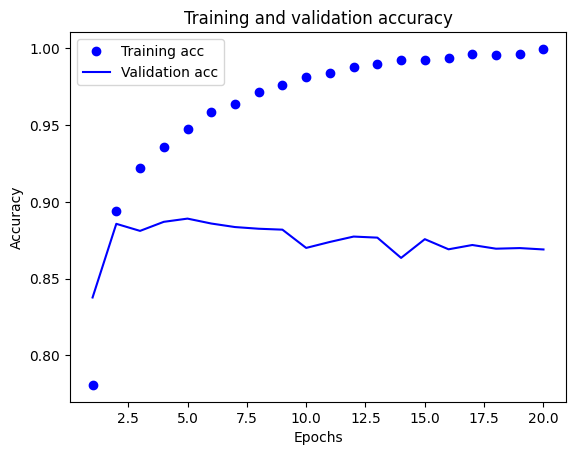

In [9]:
# 4-9 훈련과 검증 정확도 그리기

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc") # bo는 파란색 점 의미
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
# 4-10 모델을 처음부터 다시 훈련하기

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7249 - loss: 0.5795
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8981 - loss: 0.3030
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9227 - loss: 0.2217
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9343 - loss: 0.1885
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8792 - loss: 0.3015


[0.29728734493255615, 0.8813999891281128]

# 4.1.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [11]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.28563878],
       [0.9999047 ],
       [0.95956355],
       ...,
       [0.11500878],
       [0.12119032],
       [0.70826   ]], dtype=float32)

# 4.2 뉴스 기사 분류: 다중 분류 문제
## 4.2.1 로이터 데이터셋

In [12]:
# 4-11 로이터 데이터셋 로드하기

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# 4-12 로이터 데이터셋을 텍스트로 디코딩하기

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# 리뷰를 디코딩. 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위해 예약되어 있으므로 인덱스에서 3을 뺌

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 4.2.2 데이터 준비

In [14]:
# 4-13 데이터 인코딩하기

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환

In [15]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels) # 훈련 레이블 벡터로 변환
y_test = to_one_hot(test_labels) # 테스트 레이블 벡터로 변환

# 4.2.3 모델 구성

In [16]:
# 4-15 모델 정의하기

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [17]:
# 4-16 모델 컴파일하기

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy"])

# 4.2.4 훈련 검증

In [18]:
# 4-17 검증 세트 준비하기

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [19]:
# 4-18 모델 훈련하기

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3595 - loss: 3.2043 - val_accuracy: 0.6240 - val_loss: 1.8465
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6763 - loss: 1.6275 - val_accuracy: 0.6930 - val_loss: 1.3762
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7465 - loss: 1.1856 - val_accuracy: 0.7380 - val_loss: 1.1945
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7881 - loss: 0.9883 - val_accuracy: 0.7660 - val_loss: 1.0778
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8197 - loss: 0.8292 - val_accuracy: 0.7760 - val_loss: 1.0396
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8578 - loss: 0.6599 - val_accuracy: 0.8010 - val_loss: 0.9670
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8815 - loss: 0.5538 - val_accuracy: 0.7980 - val_loss: 0.9398
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8995 - loss: 0.4797 - val_accuracy: 0.8110 - 

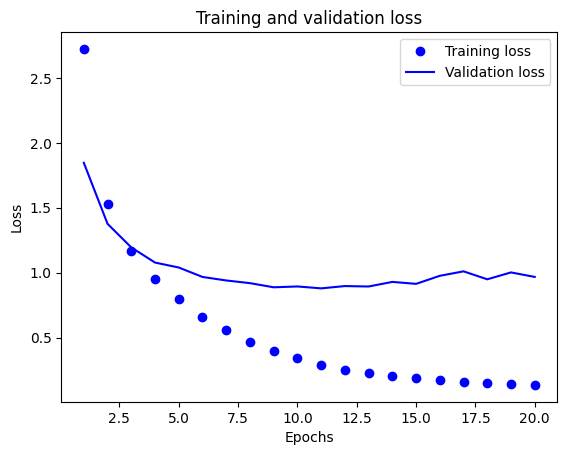

In [20]:
# 4-19 훈련과 검증 손실 그리기

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

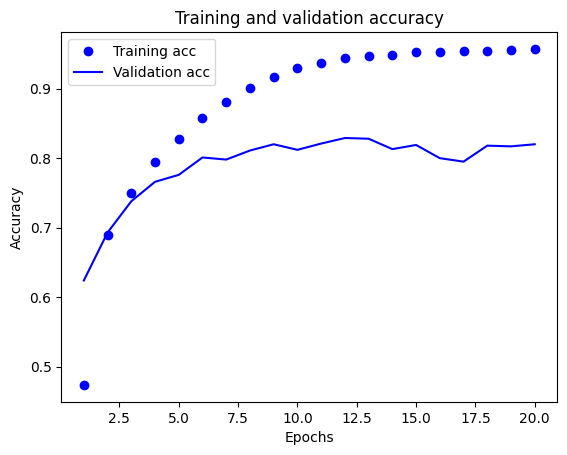

In [21]:
# 4-20 훈련과 검증 정확도 그리기

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
# 4-21 모델을 처음부터 다시 훈련하기

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy"])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 128,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

results

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4350 - loss: 2.6305 - val_accuracy: 0.6950 - val_loss: 1.2833
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7602 - loss: 1.0805 - val_accuracy: 0.7700 - val_loss: 1.0358
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8475 - loss: 0.7061 - val_accuracy: 0.7930 - val_loss: 0.9602
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8968 - loss: 0.4997 - val_accuracy: 0.8200 - val_loss: 0.8473
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9288 - loss: 0.3482 - val_accuracy: 0.8190 - val_loss: 0.8386
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9435 - loss: 0.2663 - val_accuracy: 0.8170 - val_loss: 0.8693
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9475 - loss: 0.2097 - val_accuracy: 0.8200 - val_loss: 0.8677
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9549 - loss: 0.1792 - val_accuracy: 0.8100 - v

[1.1882392168045044, 0.7822796106338501]

# 4.2.7 충분히 큰 중간층을 두어야 하는 이유:

In [24]:
# 4-22 정보 병목이 있는 모델

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.2718 - loss: 3.5178
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3522 - loss: 2.5963
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.3582 - loss: 2.1949
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.3763 - loss: 1.9748
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4673 - loss: 1.8110
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6102 - loss: 1.6241
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6130 - loss: 1.5559
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6256 - loss: 1.4265
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6326 - loss: 1.3581
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6334 - loss: 1.5173


[1.5313705205917358, 0.6277827024459839]

# 4.3 주택 가격 예측: 회귀 문제
## 4.3.1 보스턴 주택 가격 데이터셋

In [25]:
# 4-23 보스턴 주택 데이터셋 로드하기

from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 4.3.2 데이터 준비

In [26]:
# 4-24 데이터 정규화하기

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# 4.3.3 모델 구성

In [27]:
# 4-25 모델 정의하기

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

  model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ["mae"])
  return model

# 4.3.4 K-겹 검증을 사용한 훈련 검증

In [ ]:
# K-겹 검증하기

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"#{i}번째 폴드 처리 중")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[ i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i]]
  )